<a href="https://colab.research.google.com/github/Datalincy/EDA/blob/main/Geo_spatial_class_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.0 Importing libraries**

In [ ]:
#Importing the required libraries and setting up the figure parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import lightgbm as lgb
from sklearn.model_selection import KFold
from matplotlib import rcParams
dark_colors = ["#99D699", "#B2B2B2",
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]
rcParams['figure.figsize'] = (12, 9)
rcParams['figure.dpi'] = 150
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = "white"
rcParams['axes.titlesize'] = 20
rcParams['axes.labelsize'] = 17.5
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
rcParams['legend.fontsize'] = 17.5
rcParams['patch.edgecolor'] = 'none'
rcParams['grid.color']="white"
rcParams['grid.linestyle']="-"
rcParams['grid.linewidth'] = 1
rcParams['grid.alpha']=1
rcParams['text.color'] = "444444"
rcParams['axes.labelcolor'] = "444444"
rcParams['ytick.color'] = "444444"
rcParams['xtick.color'] = "444444"

**1.1 load dataset**

In [ ]:
trips_df = pd.read_csv('/content/trip.csv.zip')
stations_df = pd.read_csv('/content/station.csv')

In [ ]:
stations_df.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


**inferences:**

It looks like you have a dataset containing information about bike-sharing stations. Here’s a breakdown of what each column represents:

id: A unique identifier for each bike station.

name: The name of the bike station.

lat: The latitude coordinate of the station (geographical location).

long: The longitude coordinate of the station.

dock_count: The number of docking points available at that station.

city: The city where the station is located.

installation_date: The date when the bike station was installed.

Issue in Your Data:
The last row (ID 6, "San Pedro Square") has an issue in the installation_date column (8/7/20,,,).

The date format appears to be inconsistent, likely due to an input or formatting error.

Suggested Fix:
If the installation date follows the format MM/DD/YYYY, the missing portion should be corrected.

Check the raw dataset to ensure that the date format is consistent across all entries.

In [ ]:
stations_df.dtypes

,0
id,int64
name,object
lat,float64
long,float64
dock_count,int64
city,object
installation_date,object


**inferences:**

This output appears to be the result of checking the data types (dtype) of a DataFrame in pandas, a Python library for data analysis. Let's break it down:

0: Likely the index of the first row when displaying the data types.

id (int64): A column with integer values, likely representing a unique identifier.

name (object): A column storing text (strings), likely names of locations or stations.

lat (float64): A column storing latitude values (decimal degrees).

long (float64): A column storing longitude values (decimal degrees).

dock_count (int64): A column storing integer values, probably the number of docks at a station.

city (object): A column storing text, likely the name of a city.

installation_date (object): A column storing text, but it should ideally be converted to datetime for proper date-based operations.

This suggests that the dataset might be related to bike-sharing stations, parking docks, or some other location-based system with installations in different cities. The installation_date column should be converted to datetime using pd.to_datetime(df["installation_date"]) for better handling.

In [ ]:
heatmap = folium.Map([stations_df["lat"].median(),stations_df["long"].median()],zoom_start=10,tiles='Stamen Toner', attr='.')
# Added the attr parameter with attribution information for Stamen Toner tiles.

In [ ]:
stations_df["lat"] = stations_df["lat"].apply(lambda x:str(x))
stations_df["long"] = stations_df["long"].apply(lambda x:str(x))

In [ ]:
stations_df.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.8932,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


**inferences:**

This data appears to be a dataset of bike-sharing station locations, with the following columns:

id – A unique identifier for each station.

name – The name of the bike-sharing station.

lat – The latitude coordinate of the station.

long – The longitude coordinate of the station.

dock_count – The number of docks (bike parking spots) available at that station.

city – The city where the station is located.

installation_date – The date when the station was installed.

Example Breakdown:
Station "San Jose Diridon Caltrain Station" (ID: 2)

Located at latitude 37.329732, longitude -121.901782

Has 27 docking spaces

Installed in San Jose on 8/6/2013

Station "San Pedro Square" (ID: 6)

Located at latitude 37.336721, longitude -121.894074

Has 15 docking spaces

Installed in San Jose on 8/7/2013

In [ ]:
from folium.plugins import HeatMap
stations_loc = [[float(stations_df.lat.values[i]),float(stations_df.long.values[i])] for i in range(len(stations_df))]
heatmap.add_child(HeatMap(stations_loc,radius=10))
for index,row in stations_df.iterrows():
    folium.Marker([float(row['lat']),float(row['long'])],popup=row['name']).add_to(heatmap)

In [ ]:
heatmap

In [ ]:
trips_df.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


This dataset appears to represent bike-sharing trip data. Let's break down the columns:

id: Unique trip identifier.

duration: Duration of the trip in seconds.

start_date: Timestamp indicating when the trip started.

start_station_name: Name of the station where the trip began.

start_station_id: Unique identifier for the starting station.

end_date: Timestamp indicating when the trip ended.

end_station_name: Name of the station where the trip ended.

end_station_id: Unique identifier for the ending station.

bike_id: Unique identifier of the bike used.

subscription_type: Type of user (e.g., Subscriber for registered users, possibly Customer for occasional users).

zip_code: The postal code of the subscriber.

Example Breakdown of Row 4:
Trip ID: 4299

Duration: 83 seconds (~1 minute, 23 seconds)

Start Time: August 29, 2013, at 12:02 PM

Start Station: South Van Ness at Market (Station ID: 66)

End Time: August 29, 2013, at 12:04 PM

End Station: Market at 10th (Station ID: 67)

Bike Used: Bike ID 319

Subscription Type: Subscriber (likely a regular user with a membership)

Zip Code: 94103 (likely the postal code of the user)

In [ ]:
trips_df['start_date'] = pd.to_datetime(trips_df['start_date'])
trips_df['end_date'] = pd.to_datetime(trips_df['end_date'])

In [ ]:
start_station_info = stations_df[["id","lat","long"]]
start_station_info.columns = ["start_station_id","start_lat","start_long"]
end_station_info = stations_df[["id","lat","long"]]
end_station_info.columns = ["end_station_id","end_lat","end_long"]
trips_df = trips_df.merge(start_station_info,on="start_station_id")
trips_df = trips_df.merge(end_station_info,on="end_station_id")

In [ ]:
trips_df.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,start_lat,start_long,end_lat,end_long
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,37.774814,-122.418954,37.774814,-122.418954
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,37.337391,-121.886995,37.337391,-121.886995
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,37.389218,-122.081896,37.389218,-122.081896
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,37.337391,-121.886995,37.337391,-121.886995
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,37.774814,-122.418954,37.776619,-122.417385


This dataset represents bike-sharing trips, where each row details an individual trip taken by a user. Let's break down the columns:

id: A unique identifier for each trip.

duration: The duration of the trip in seconds.

start_date: The date and time when the trip started.

start_station_name: The name of the station where the trip began.

start_station_id: A unique ID for the start station.

end_date: The date and time when the trip ended.

end_station_name: The name of the station where the trip ended.

end_station_id: A unique ID for the end station.

bike_id: A unique identifier for the bike used in the trip.

subscription_type: Indicates whether the user was a Subscriber (regular member) or a Casual rider (not a subscriber).

zip_code: The postal code of the user (likely based on their subscription registration).

start_lat & start_long: The latitude and longitude coordinates of the start station.

end_lat & end_long: The latitude and longitude coordinates of the end station.

Observations:
Short Trips: Most trips in this sample are very short (less than 2 minutes), possibly indicating short commutes or quick errands.

Round Trips: Some trips start and end at the same station

In [ ]:
plot_dict = dict()
for index,row in trips_df.iterrows():
    start_lat = row['start_lat']
    start_long = row['start_long']
    end_lat = row['end_lat']
    end_long = row['end_long']
    key = str(start_lat)+'_'+str(start_long)+'_'+str(end_lat)+'_'+str(end_long)
    if key in plot_dict:
        plot_dict[key] += 1
    else:
        plot_dict[key] = 1

In [ ]:
start_lat = []
start_long = []
end_lat = []
end_long = []
nb_trips = []
for key,value in plot_dict.items():
    start_lat.append(float(key.split('_')[0]))
    start_long.append(float(key.split('_')[1]))
    end_lat.append(float(key.split('_')[2]))
    end_long.append(float(key.split('_')[3]))
    nb_trips.append(int(value))

In [ ]:
temp_df = pd.DataFrame({"start_lat":start_lat,"start_long":start_long,"end_lat":end_lat,"end_long":end_long,"nb_trips":nb_trips})

In [ ]:
temp_df.dtypes

,0
start_lat,float64
start_long,float64
end_lat,float64
end_long,float64
nb_trips,int64


**inferences:**

It looks like you have another dataset, possibly related to bike-sharing trip data. Here’s what each column represents:

start_lat (float64): The latitude coordinate where the trip started.

start_long (float64): The longitude coordinate where the trip started.

end_lat (float64): The latitude coordinate where the trip ended.

end_long (float64): The longitude coordinate where the trip ended.

nb_trips (int64): The number of trips recorded between the given start and end locations.

Issues in Your Data:
The data type for each column is mentioned (e.g., float64 for latitude and longitude, int64 for trip count).

The last column, nb_trips, has extra commas (int64,,) that may indicate a formatting error.

Possible Interpretation:
This dataset likely summarizes bike-sharing trips between various locations. Each row represents a route, showing the number of trips taken from a specific start location (latitude & longitude) to an end location.

<Axes: >

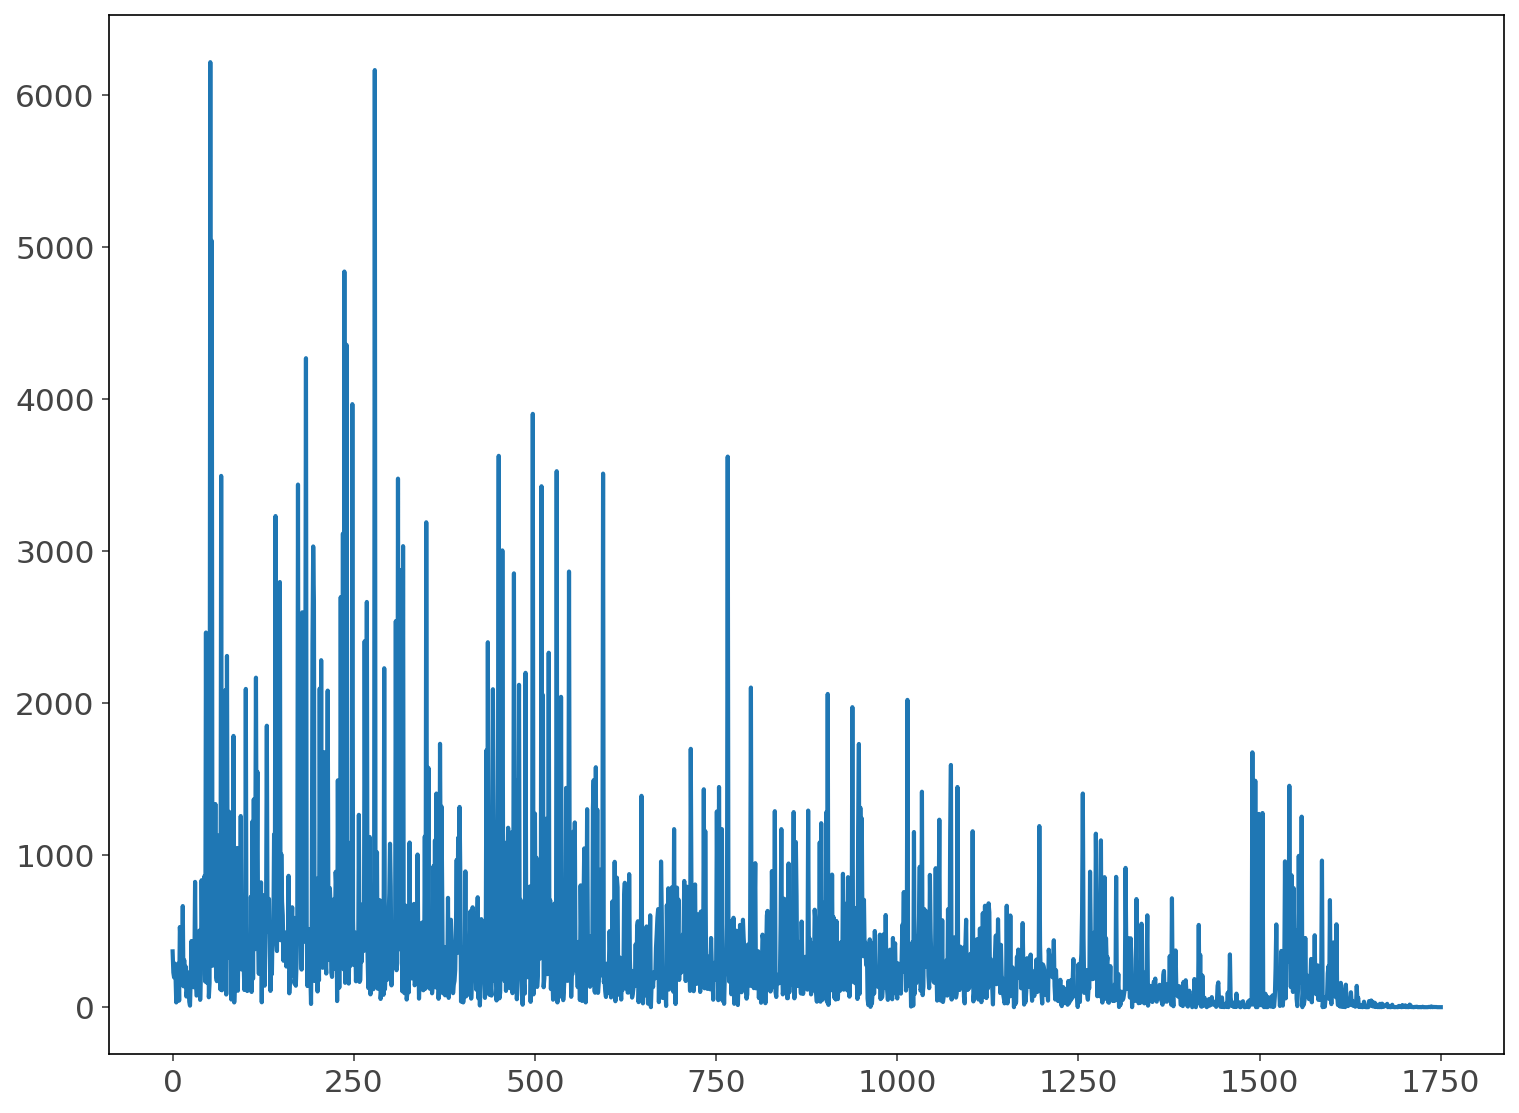

In [ ]:
temp_df.nb_trips.plot()

In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_lat   1751 non-null   float64
 1   start_long  1751 non-null   float64
 2   end_lat     1751 non-null   float64
 3   end_long    1751 non-null   float64
 4   nb_trips    1751 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 68.5 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_lat   1751 non-null   float64
 1   start_long  1751 non-null   float64
 2   end_lat     1751 non-null   float64
 3   end_long    1751 non-null   float64
 4   nb_trips    1751 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 68.5 KB

In [ ]:
temp_df.head()

,start_lat,start_long,end_lat,end_long,nb_trips
0,37.774814,-122.418954,37.774814,-122.418954,368
1,37.337391,-121.886995,37.337391,-121.886995,229
2,37.389218,-122.081896,37.389218,-122.081896,197
3,37.774814,-122.418954,37.776619,-122.417385,288
4,37.781332,-122.418603,37.781332,-122.418603,210


In [ ]:
ave_lat = (temp_df.start_lat.median()+temp_df.end_lat.median())/2
ave_lon = (temp_df.start_long.median()+temp_df.end_long.median())/2
directions_map = folium.Map(location=[ave_lat, ave_lon], zoom_start=15)

In [ ]:
for index,row in temp_df.iterrows():
    points = []
    points.append(tuple([row['start_lat'],row['start_long']]))
    points.append(tuple([row['end_lat'],row['end_long']]))
    folium.PolyLine(points,color='red',weight=row['nb_trips']/1000).add_to(directions_map)

In [ ]:
for index,row in stations_df.iterrows():
    folium.Marker([float(row['lat']),float(row['long'])],popup=row['name']).add_to(directions_map)

In [ ]:
directions_map

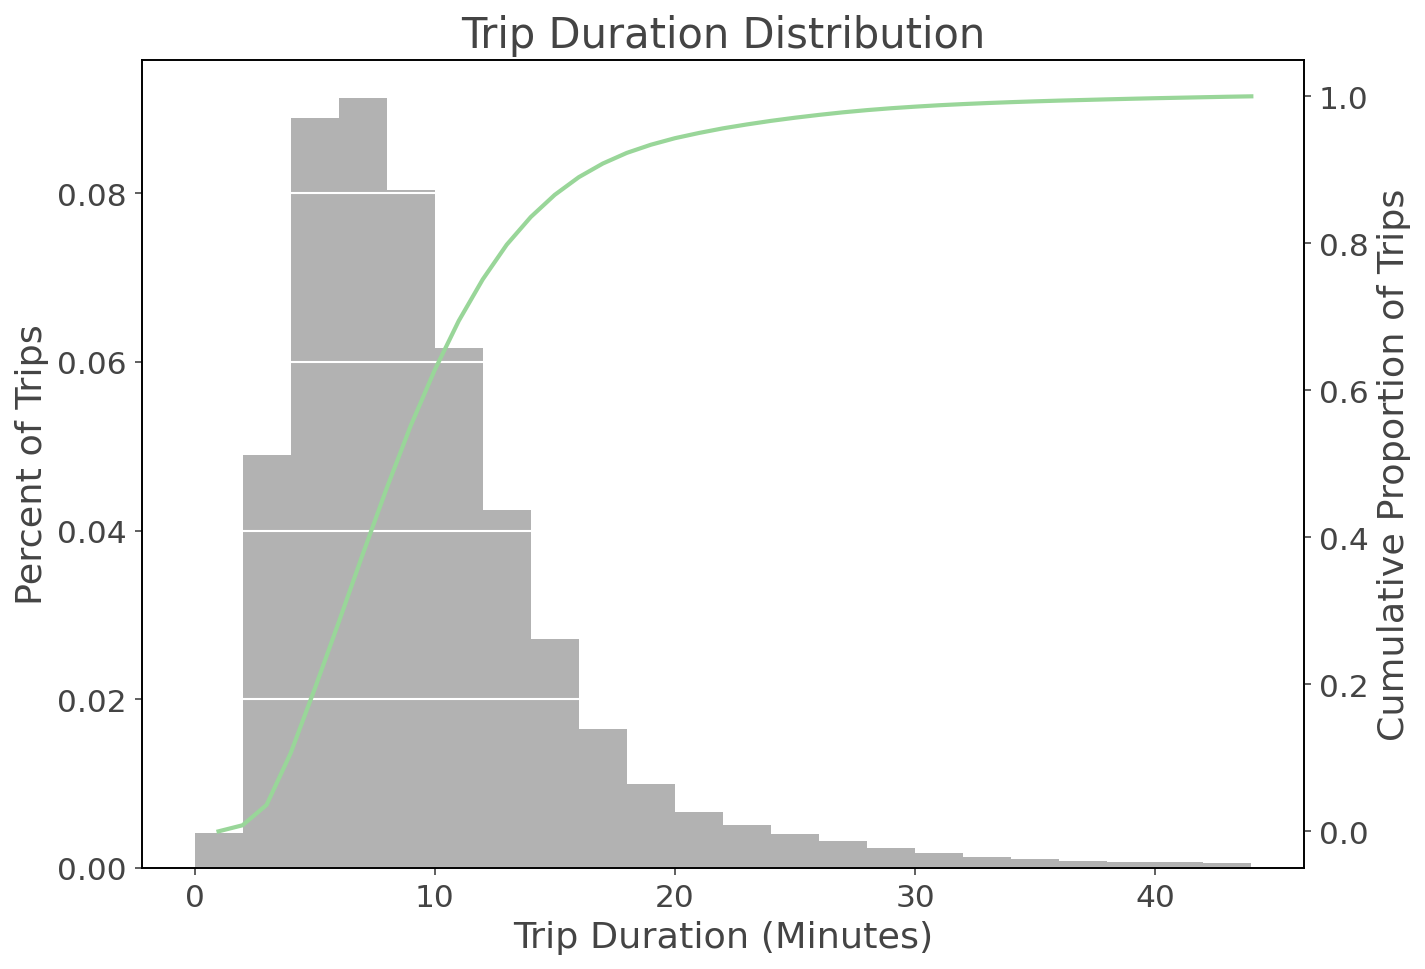

<Figure size 2250x1800 with 0 Axes>

In [ ]:
fig, ax1 = plt.subplots(figsize = (10,7))
ax1.grid(zorder=1)
ax1.xaxis.grid(False)
trip_dur = trips_df['duration'].values/60
# Replace 'normed=True' with 'density=True'
plt.hist(trip_dur, bins = range(0,45,2),density=True,zorder=0,color=dark_colors[1])
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Percent of Trips')
plt.title('Trip Duration Distribution')
plt.figure(figsize=(15,12))
# Replace 'normed=True' with 'density=True'
hist, bin_edges = np.histogram(trip_dur, range(0,45,1), density=True)
cum_trip_dur = np.cumsum(hist)
ax2 = ax1.twinx()
ax2.plot(range(1,45,1),cum_trip_dur,c=dark_colors[0])
ax2.set_ylabel('Cumulative Proportion of Trips')
ax2.grid(visible=False) # Changed b=False to visible=False to disable grid

In [ ]:
trips_df.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,start_lat,start_long,end_lat,end_long
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,37.774814,-122.418954,37.774814,-122.418954
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,37.337391,-121.886995,37.337391,-121.886995
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,37.389218,-122.081896,37.389218,-122.081896
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,37.337391,-121.886995,37.337391,-121.886995
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,37.774814,-122.418954,37.776619,-122.417385


In [ ]:
trips_df['week']=trips_df.start_date.dt.dayofweek
trips_df['start_hour'] = trips_df.start_date.dt.hour
trips_df['start_day'] = trips_df.start_date.dt.day
trips_df['end_hour'] = trips_df.end_date.dt.hour
trips_df['end_day'] = trips_df.end_date.dt.day

Text(0.5, 1.0, 'Trip Duration Distribution Over Time of Day (Week Days)')

<Figure size 2250x1800 with 0 Axes>

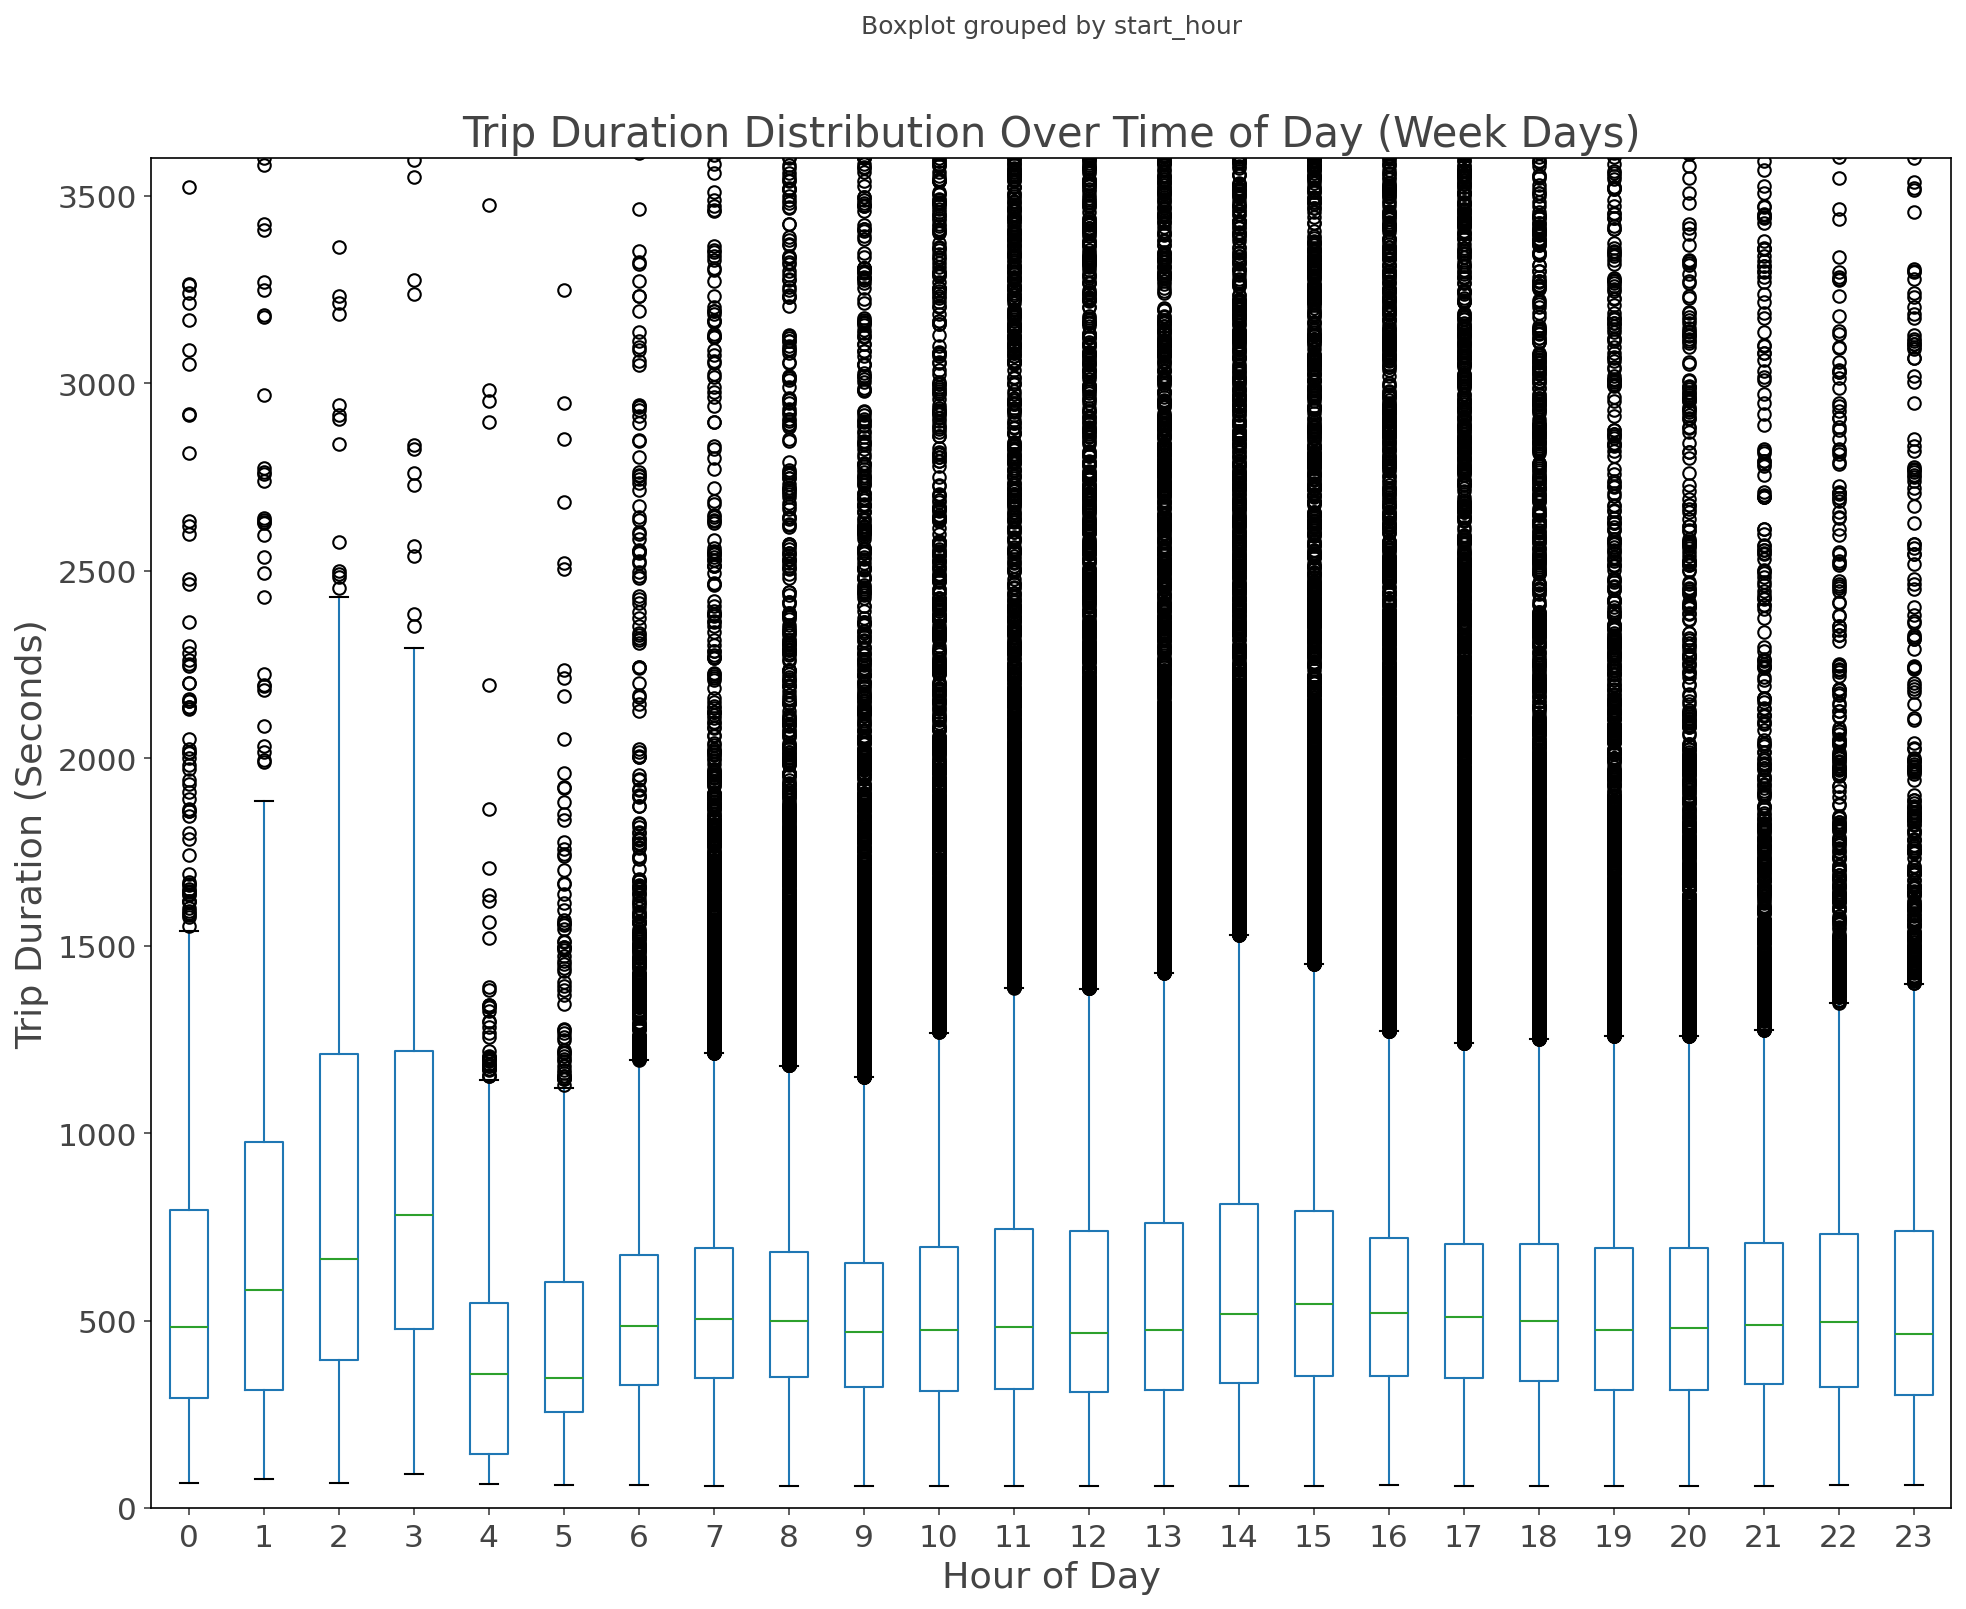

In [ ]:
plt.figure(figsize=(15,12))
weekdaytrips_df = trips_df.loc[(trips_df.duration <= 7200) & (trips_df.week <5)]
weekdaytrips_df.boxplot(column="duration",by="start_hour",figsize=(15,12))
plt.ylim(0,3600)
plt.ylabel('Trip Duration (Seconds)')
plt.xlabel('Hour of Day')
plt.title('Trip Duration Distribution Over Time of Day (Week Days)')

**inferences**

his is a box plot showing the distribution of trip durations (in seconds) over different hours of the day on weekdays. Let me explain the key elements of the chart:

X-axis (Hour of Day): Represents the hours of the day (0 to 23), indicating when trips started.

Y-axis (Trip Duration in Seconds): Shows the duration of trips in seconds.

Boxplots: Each box represents the interquartile range (IQR) of trip durations for a given hour:

The box shows the middle 50% of data.

The horizontal line inside the box is the median trip duration.

The whiskers extend to the minimum and maximum values within 1.5 times the IQR.

The dots above the whiskers are outliers, indicating trips that were much longer than the typical range.

Observations:
There are a significant number of outliers, especially in the later hours of the day, showing that some trips last much longer than usual.

The median trip duration remains relatively stable across the day.

The distribution appears to be more spread out in early morning hours (0-4 AM) compared to later hours.

The highest density of outliers is seen between 10 AM and 11 PM, which suggests some users have unusually long trips.

Text(0.5, 1.0, 'Trip Duration Distribution Over Time of Day (Weekend days)')

<Figure size 2250x1800 with 0 Axes>

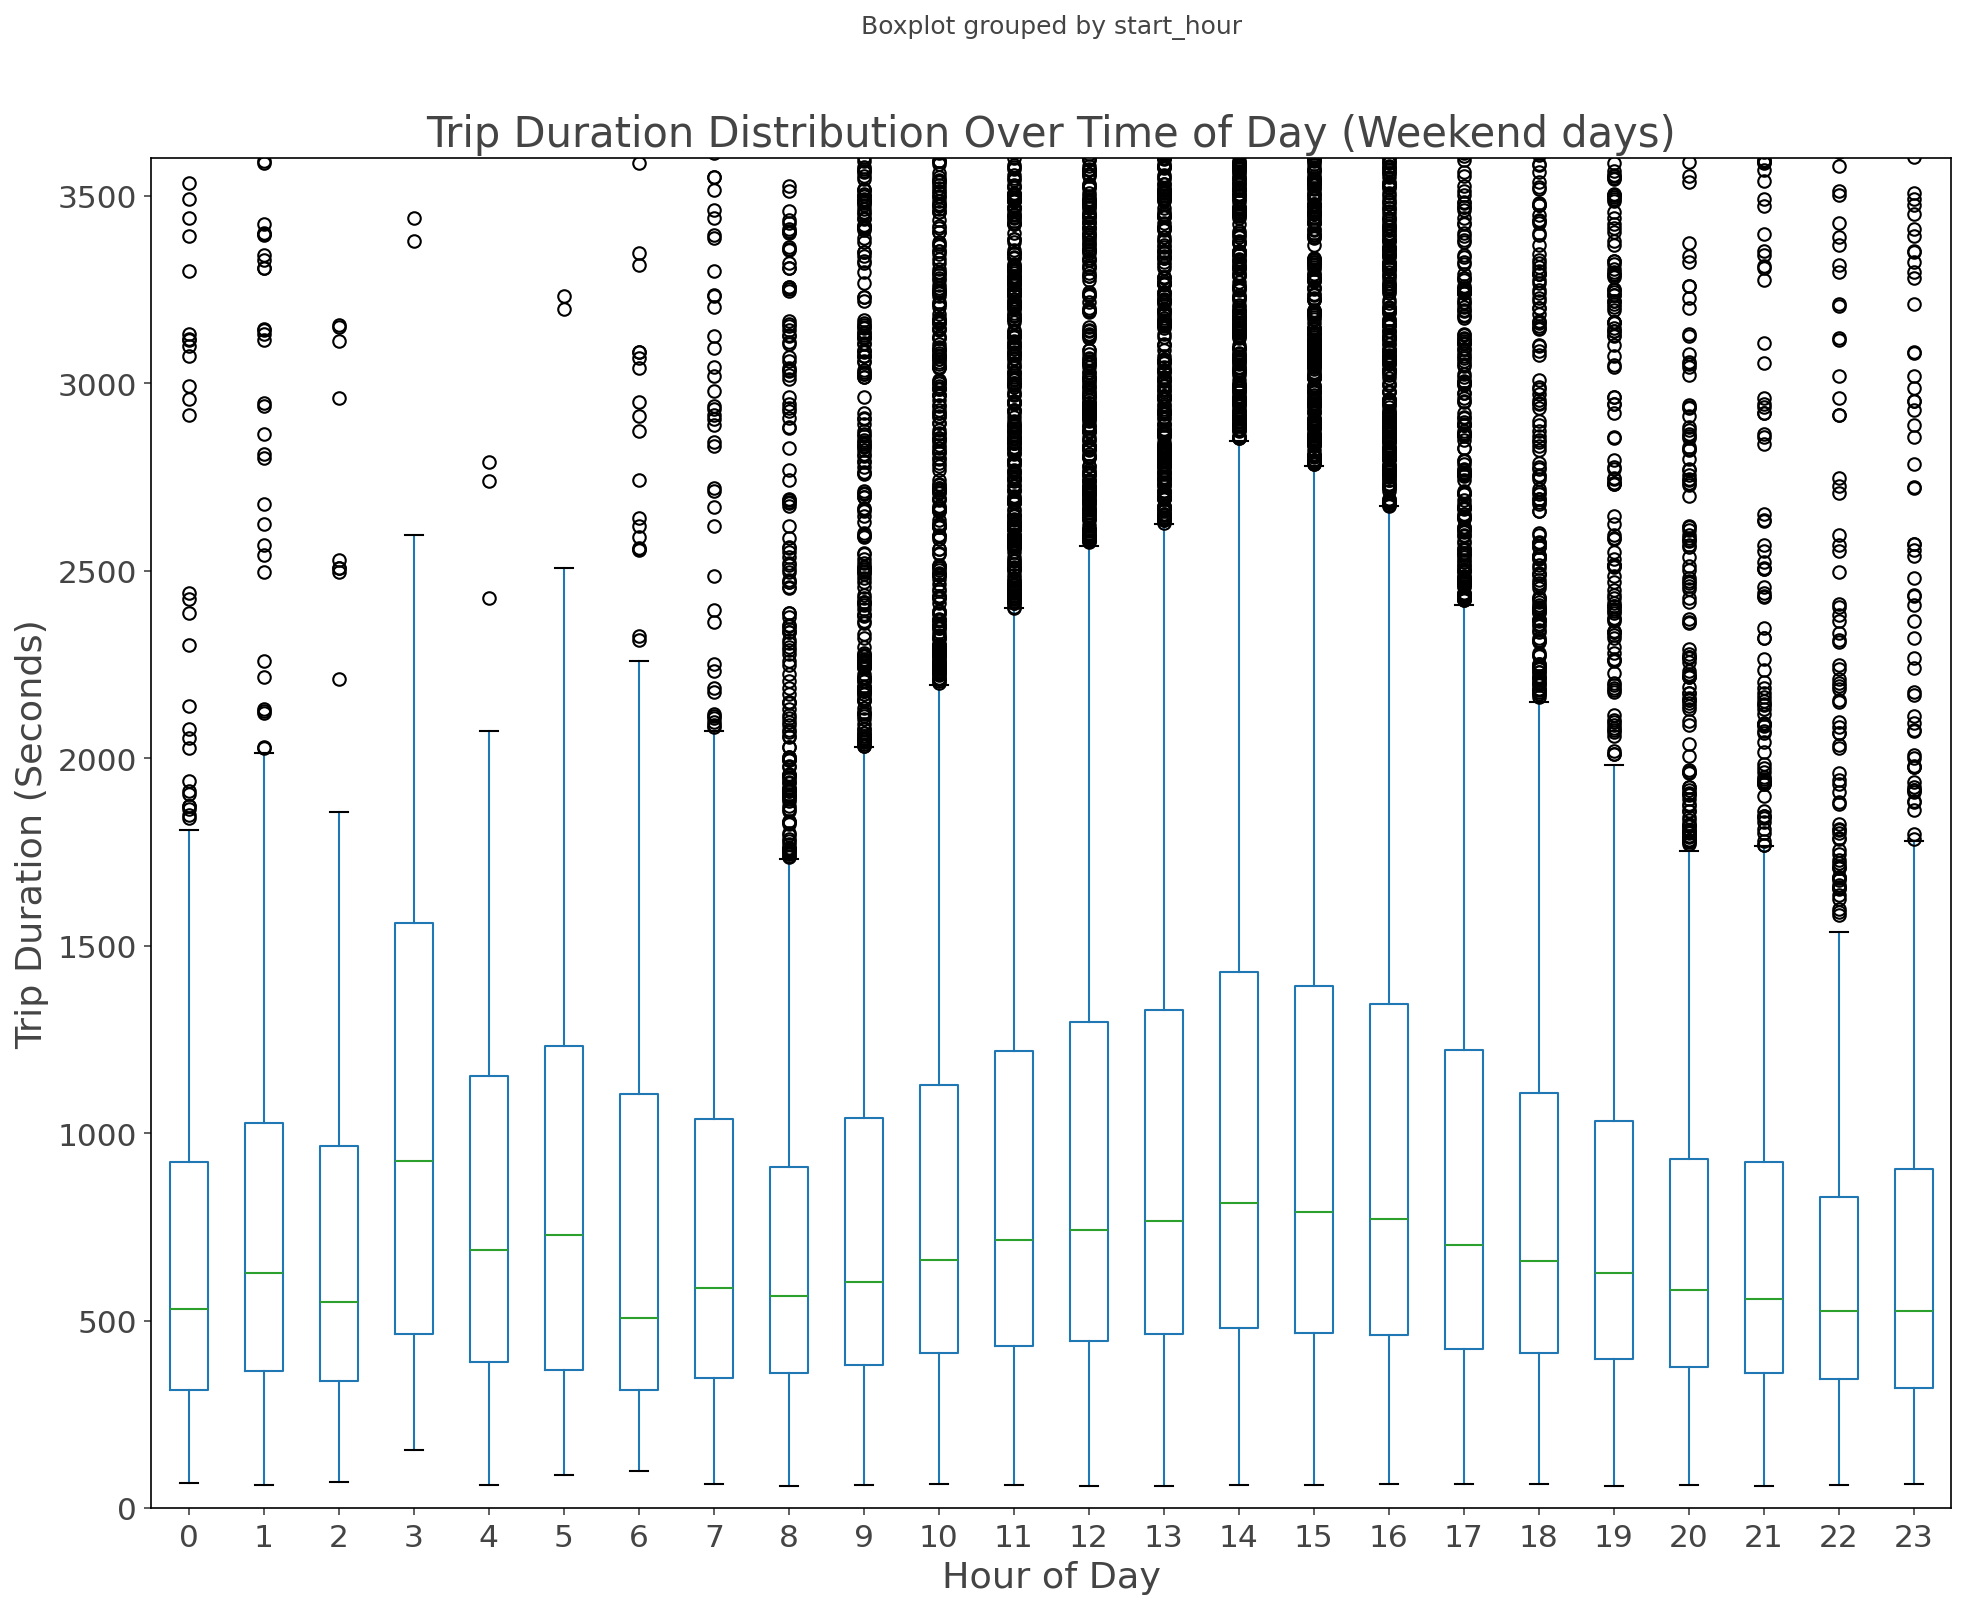

In [ ]:
plt.figure(figsize=(15,12))
weekendtrips_df = trips_df.loc[(trips_df.duration <= 7200) & (trips_df.week >4)]
weekendtrips_df.boxplot(column="duration",by="start_hour",figsize=(15,12))
plt.ylim(0,3600)
plt.ylabel('Trip Duration (Seconds)')
plt.xlabel('Hour of Day')
plt.title('Trip Duration Distribution Over Time of Day (Weekend days)')

In [ ]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
import pandas as pd
import numpy as np

def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

status_df = reduce_mem_usage(pd.read_csv('/content/status.csv.zip')) # Now the function is defined before being called.

Memory usage of dataframe is 2196.79 MB
Memory usage after optimization is: 755.15 MB
Decreased by 65.6%


In [ ]:
status_df.head()

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01
3,2,2,25,2013/08/29 12:09:01
4,2,2,25,2013/08/29 12:10:01


**inference:**

The given dataset represents a bike-sharing station's availability over time. Let's break down the columns:

station_id: Identifies the station (in this case, station 2).

bikes_available: The number of bikes currently available for use.

docks_available: The number of empty docks where bikes can be returned.

time: The timestamp when the data was recorded.

Explanation:
The dataset records bike availability at one-minute intervals.

For each timestamp, the number of available bikes (bikes_available) and empty docks (docks_available) remains constant (2 and 25, respectively).

This suggests no changes in the station's bike usage during the recorded period.

The format of time is YYYY/MM/DD HH:MM:SS, indicating the exact moment of data collection.

Possible Interpretations:
No bikes were taken or returned during this timeframe.

The station might not be frequently used at this particular time.

There could be a system update delay where data isn't refreshing properly.

In [ ]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71984434 entries, 0 to 71984433
Data columns (total 4 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   station_id       int8  
 1   bikes_available  int8  
 2   docks_available  int8  
 3   time             object
dtypes: int8(3), object(1)
memory usage: 755.1+ MB


In [ ]:
status_df.time = pd.to_datetime(status_df.time, infer_datetime_format=True, errors='coerce')


status_df.time = pd.to_datetime(status_df.time, format='%Y/%m/%d %H:%M:%S') # Changed format to '%Y/%m/%d %H:%M:%S' to match the actual format of the time data
status_df = status_df[status_df.time.dt.minute%5 ==0]

<ipython-input-16-dd016c523632>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  status_df.time = pd.to_datetime(status_df.time, infer_datetime_format=True, errors='coerce')


In [ ]:
import pandas as pd

# Load the stations dataframe
stations_df = pd.read_csv('/content/station.csv')

# Now you can rename the column
stations_df.rename(columns={"id":"station_id"},inplace=True)

In [ ]:
stations_df.installation_date = pd.to_datetime(stations_df.installation_date)

In [ ]:
status_df = status_df.merge(stations_df,on="station_id",how="left")

In [ ]:
status_df.head()

,station_id,bikes_available,docks_available,time,name,lat,long,dock_count,city,installation_date
0,2,2,25,2013-08-29 12:10:01,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,2013-08-06
1,2,2,25,2013-08-29 12:15:01,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,2013-08-06
2,2,2,25,2013-08-29 12:20:01,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,2013-08-06
3,2,2,25,2013-08-29 12:25:01,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,2013-08-06
4,2,2,25,2013-08-29 12:30:01,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,2013-08-06


In [ ]:
status_df.reset_index(inplace=True)
status_df.drop(columns=["index"],inplace=True)

In [ ]:
status_df["date"] = status_df.time.dt.date

In [ ]:
status_df.head()

,station_id,bikes_available,docks_available,time,name,lat,long,dock_count,city,installation_date,date
0,2,2,25,2013-08-29 12:10:01,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,2013-08-06,2013-08-29
1,2,2,25,2013-08-29 12:15:01,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,2013-08-06,2013-08-29
2,2,2,25,2013-08-29 12:20:01,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,2013-08-06,2013-08-29
3,2,2,25,2013-08-29 12:25:01,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,2013-08-06,2013-08-29
4,2,2,25,2013-08-29 12:30:01,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,2013-08-06,2013-08-29


In [ ]:
weather_df = reduce_mem_usage(pd.read_csv('/content/weather (1).csv'))

Memory usage of dataframe is 0.67 MB
Memory usage after optimization is: 0.24 MB
Decreased by 64.6%


In [ ]:
weather_df.date = pd.to_datetime(weather_df.date)

In [ ]:
weather_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,2013-08-30,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,2013-08-31,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,2013-09-01,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,2013-09-02,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


Mapping of Zip Codes ans City names
95113 - San Jose
94301 - Palo Alto
94107 - San Francisco
94063 - Redwood City
94063 - Redwood city

In [ ]:
zipcode_city_dict = dict()
zipcode_city_dict[95113] = 'San Jose'
zipcode_city_dict[94301] = 'Palo Alto'
zipcode_city_dict[94107] = 'San Francisco'
zipcode_city_dict[94063] = 'Redwood City'
zipcode_city_dict[94041] = 'Mountain View'

In [ ]:
weather_df["city"] = weather_df.zip_code.apply(lambda x:zipcode_city_dict[x])

In [ ]:
weather_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,city
0,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,San Francisco
1,2013-08-30,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107,San Francisco
2,2013-08-31,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107,San Francisco
3,2013-09-01,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107,San Francisco
4,2013-09-02,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107,San Francisco


In [ ]:
status_df.date = pd.to_datetime(status_df.date)

In [ ]:
status_df = status_df.merge(weather_df,how="left",on=["date","city"])

In [ ]:
status_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,station_id,bikes_available,docks_available,time,name,lat,long,dock_count,city,installation_date,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,2,2,25,2013-08-29 12:10:01,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,2013-08-06,...,10.0,10.0,16.0,7.0,24.0,0,4.0,NaN,320.0,95113
1,2,2,25,2013-08-29 12:15:01,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,2013-08-06,...,10.0,10.0,16.0,7.0,24.0,0,4.0,NaN,320.0,95113
2,2,2,25,2013-08-29 12:20:01,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,2013-08-06,...,10.0,10.0,16.0,7.0,24.0,0,4.0,NaN,320.0,95113
3,2,2,25,2013-08-29 12:25:01,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,2013-08-06,...,10.0,10.0,16.0,7.0,24.0,0,4.0,NaN,320.0,95113
4,2,2,25,2013-08-29 12:30:01,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,2013-08-06,...,10.0,10.0,16.0,7.0,24.0,0,4.0,NaN,320.0,95113


In [ ]:
status_df.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
status_df["events"] = le.fit_transform(status_df["events"])
status_df["precipitation_inches"] = le.fit_transform(status_df["precipitation_inches"])
status_df["name"] = le.fit_transform(status_df["name"])

In [ ]:
status_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,station_id,bikes_available,docks_available,time,name,lat,long,dock_count,city,installation_date,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
954,2,11,16,2013-09-02 00:05:01,53,37.329732,-121.901782,27,San Jose,2013-08-06,...,10.0,10.0,21.0,8.0,25.0,39,5.0,2,315.0,95113
955,2,11,16,2013-09-02 00:10:01,53,37.329732,-121.901782,27,San Jose,2013-08-06,...,10.0,10.0,21.0,8.0,25.0,39,5.0,2,315.0,95113
956,2,11,16,2013-09-02 00:15:01,53,37.329732,-121.901782,27,San Jose,2013-08-06,...,10.0,10.0,21.0,8.0,25.0,39,5.0,2,315.0,95113
957,2,11,16,2013-09-02 00:20:01,53,37.329732,-121.901782,27,San Jose,2013-08-06,...,10.0,10.0,21.0,8.0,25.0,39,5.0,2,315.0,95113
958,2,12,15,2013-09-02 00:25:01,53,37.329732,-121.901782,27,San Jose,2013-08-06,...,10.0,10.0,21.0,8.0,25.0,39,5.0,2,315.0,95113


In [ ]:
df = pd.DataFrame(np.random.randn(len(status_df), 1))
msk = np.random.rand(len(df)) < 0.6666
status_df_train = status_df[msk]
status_df_test = status_df[~msk]

In [ ]:
y_train = status_df_train.bikes_available
status_df_train.drop(columns=["bikes_available"],inplace=True)
y_test = status_df_test.bikes_available
status_df_test.drop(columns=["bikes_available"],inplace=True)

<ipython-input-41-86212b4396a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  status_df_train.drop(columns=["bikes_available"],inplace=True)
<ipython-input-41-86212b4396a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  status_df_test.drop(columns=["bikes_available"],inplace=True)


In [ ]:
features = [c for c in status_df_train.columns if c not in ['time','installation_date','date','city','lat','long','name']]

In [ ]:
features

['station_id',
 'docks_available',
 'dock_count',
 'max_temperature_f',
 'mean_temperature_f',
 'min_temperature_f',
 'max_dew_point_f',
 'mean_dew_point_f',
 'min_dew_point_f',
 'max_humidity',
 'mean_humidity',
 'min_humidity',
 'max_sea_level_pressure_inches',
 'mean_sea_level_pressure_inches',
 'min_sea_level_pressure_inches',
 'max_visibility_miles',
 'mean_visibility_miles',
 'min_visibility_miles',
 'max_wind_Speed_mph',
 'mean_wind_speed_mph',
 'max_gust_speed_mph',
 'precipitation_inches',
 'cloud_cover',
 'events',
 'wind_dir_degrees',
 'zip_code']

In [ ]:
import lightgbm as lgb # Make sure lightgbm is imported as lgb
import time
from sklearn.model_selection import KFold # Import KFold within the same cell where it's used

folds = KFold(n_splits=5, shuffle=True, random_state=15)
oof = np.zeros(len(status_df_train))
predictions = np.zeros(len(status_df_test))
start = time.time()
feature_importance_df = pd.DataFrame()


param = {'num_leaves': 100,
         'min_data_in_leaf': 30,
         'objective':'regression',
         'max_depth': 6,
         'learning_rate': 0.005,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1}
for fold_, (trn_idx, val_idx) in enumerate(folds.split(status_df_train.values, y_train.values)):
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(status_df_train.iloc[trn_idx][features], label=y_train.iloc[trn_idx])
    val_data = lgb.Dataset(status_df_train.iloc[val_idx][features], label=y_train.iloc[val_idx])
    num_round = 500
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], callbacks=[lgb.early_stopping(stopping_rounds=200), lgb.log_evaluation(period=100)]) # Pass verbose_eval and early_stopping_rounds as callbacks
    oof[val_idx] = clf.predict(status_df_train.iloc[val_idx][features], num_iteration=clf.best_iteration)

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    predictions += clf.predict(status_df_test[features], num_iteration=clf.best_iteration) / folds.n_splits

fold n°0
Training until validation scores don't improve for 200 rounds
[100]	training's rmse: 2.39238	valid_1's rmse: 2.40163
[200]	training's rmse: 1.57975	valid_1's rmse: 1.58759
[300]	training's rmse: 1.08	valid_1's rmse: 1.08697
[400]	training's rmse: 0.75273	valid_1's rmse: 0.759238
[500]	training's rmse: 0.568857	valid_1's rmse: 0.575162
Did not meet early stopping. Best iteration is:
[500]	training's rmse: 0.568857	valid_1's rmse: 0.575162
fold n°1
Training until validation scores don't improve for 200 rounds
[100]	training's rmse: 2.39181	valid_1's rmse: 2.40143
[200]	training's rmse: 1.58074	valid_1's rmse: 1.58836
[300]	training's rmse: 1.07986	valid_1's rmse: 1.08698
[400]	training's rmse: 0.752568	valid_1's rmse: 0.760483
[500]	training's rmse: 0.569105	valid_1's rmse: 0.578251
Did not meet early stopping. Best iteration is:
[500]	training's rmse: 0.569105	valid_1's rmse: 0.578251
fold n°2
Training until validation scores don't improve for 200 rounds
[100]	training's rmse: 

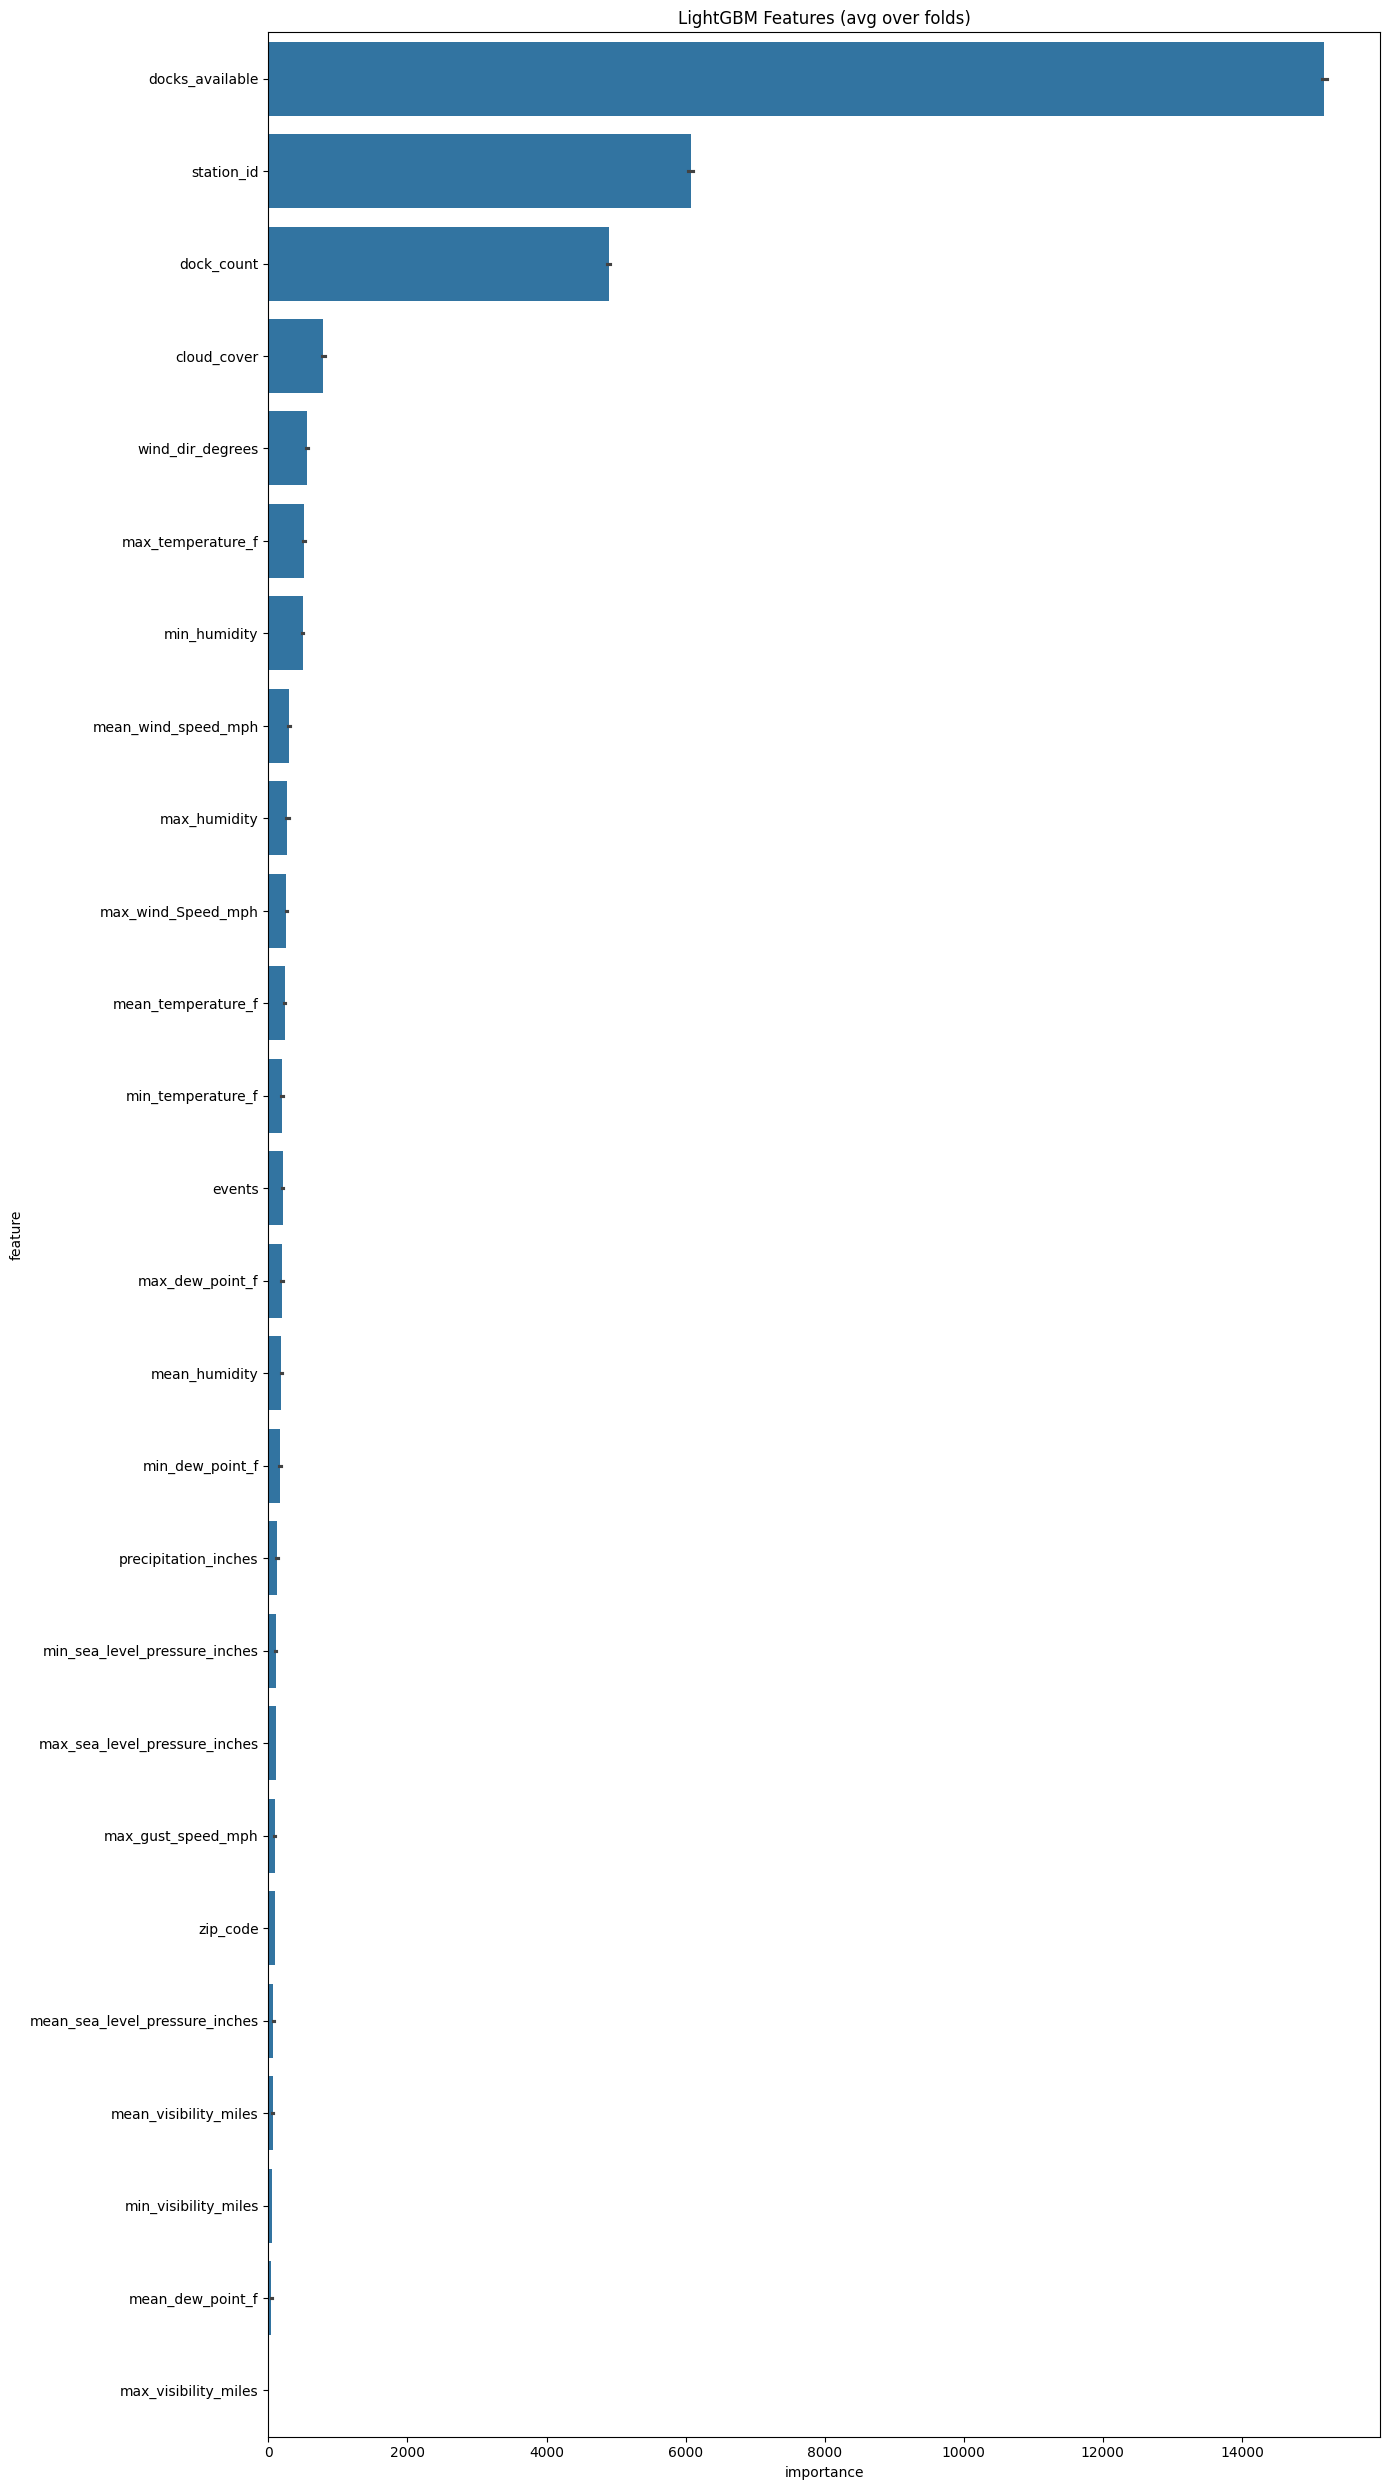

In [ ]:
import matplotlib.pyplot as plt # Add this line to import matplotlib.pyplot
import seaborn as sns
cols = (feature_importance_df[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:1000].index)

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,25)) # Now plt is defined and can be used
sns.barplot(x="importance",
            y="feature",
            data=best_features.sort_values(by="importance",
                                           ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')

There is a lot to be done in feature engineering area using windowing method as this is time series model and the number of bikes at current time depend upon the past available number of bikes like within last 10 minutes and 30 minutes window . I will commit the second version with in short span¶